<a href="https://colab.research.google.com/github/nat-tsang/MTE203_Project2/blob/main/MTE203_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.datasets import mnist

11490434/11490434 [==============================] - 0s 0us/step


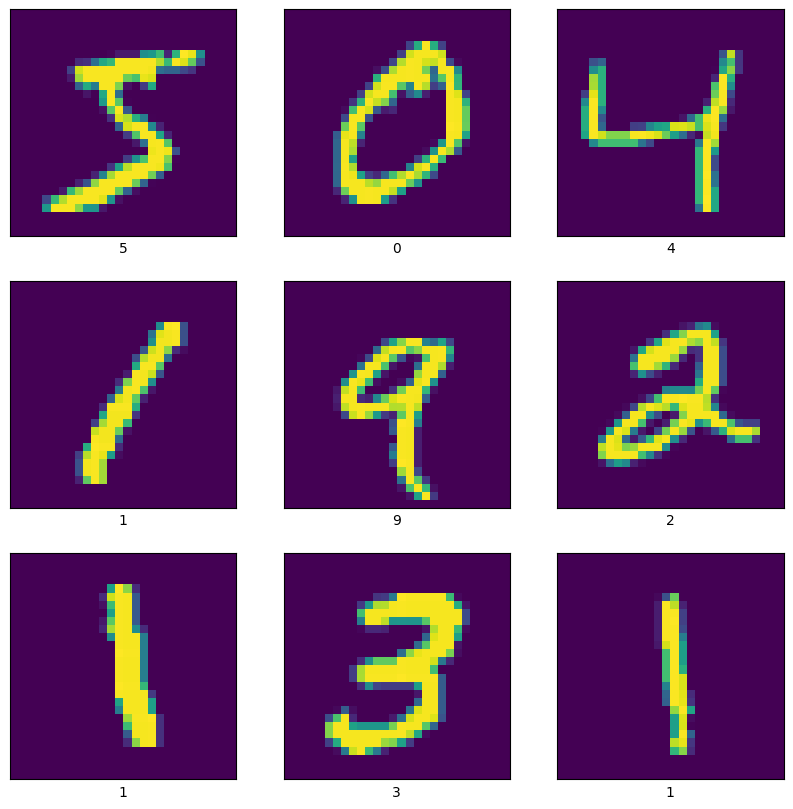

In [ ]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

class_names = ['0', '1', '2', '3', '4',
               '5', '6', '7', '8', '9']
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

train_images = train_images.reshape((60000, 28 * 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28 * 28)).astype('float32') / 255
train_labels = tf.one_hot(train_labels, 10)
test_labels = tf.one_hot(test_labels, 10)

In [ ]:
input_size = 784  # 28x28 images flattened
hidden_sizes = [128]
output_size = 10  # 10 classes (digits 0-9)
learning_rate = 2
num_epochs = 200

In [ ]:
def initialize_parameters(input_size, hidden_sizes, output_size):
    parameters = {}
    layer_sizes = [input_size] + hidden_sizes + [output_size]

    for i in range(1, len(layer_sizes)):
        parameters[f'W{i}'] = np.random.randn(layer_sizes[i - 1], layer_sizes[i]) * 0.01
        parameters[f'b{i}'] = np.zeros((1, layer_sizes[i]))

    return parameters

In [ ]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

def relu(x):
  return np.maximum(0,x)

def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / exp_x.sum(axis=1, keepdims=True)

In [ ]:
def forward(X, parameters):
    cache = {'A0': X}

    for i in range(1, len(parameters) // 2 + 1):
        Z = np.dot(cache[f'A{i-1}'], parameters[f'W{i}']) + parameters[f'b{i}']
        A = sigmoid(Z)

        cache[f'Z{i}'] = Z
        cache[f'A{i}'] = A

    return cache

In [ ]:
def backward(X, Y, cache, parameters, learning_rate):
    m = X.shape[0]  # Number of training examples
    gradients = {}

    A_output = cache['A' + str(len(parameters) // 2)]

    # Compute the gradient of the output layer
    dZ = A_output - Y
    dW = np.dot(cache['A' + str(len(parameters) // 2 - 1)].T, dZ) / m
    db = np.sum(dZ, axis=0, keepdims=True) / m

    gradients['dZ' + str(len(parameters) // 2)] = dZ
    gradients['dW' + str(len(parameters) // 2)] = dW
    gradients['db' + str(len(parameters) // 2)] = db

    # Compute the gradient for hidden layers
    for l in range(len(parameters) // 2 - 1, 0, -1):
        dZ = np.dot(gradients['dZ' + str(l + 1)], parameters['W' + str(l + 1)].T) * cache['A' + str(l)] * (1 - cache['A' + str(l)])
        dW = np.dot(cache['A' + str(l - 1)].T, dZ) / m
        db = np.sum(dZ, axis=0, keepdims=True) / m

        gradients['dZ' + str(l)] = dZ
        gradients['dW' + str(l)] = dW
        gradients['db' + str(l)] = db

    # Update weights(parameters) using the gradients
    for l in range(1, len(parameters) // 2 + 1):
        parameters['W' + str(l)] -= learning_rate * gradients['dW' + str(l)]
        parameters['b' + str(l)] -= learning_rate * gradients['db' + str(l)]

    return parameters

In [ ]:
def compute_loss(y, y_pred):
    epsilon = 1e-15
    Y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.sum(y * np.log(y_pred)) / len(y)

In [ ]:
def train(X, Y, input_size, hidden_size, output_size, learning_rate, num_epochs):
    parameters = initialize_parameters(input_size, hidden_size, output_size)

    for epoch in range(num_epochs):
        cache = forward(X, parameters)
        loss = compute_loss(Y, cache['A' + str(len(parameters)//2)])
        parameters = backward(X, Y, cache, parameters, learning_rate)
        if (epoch + 1) % 10 == 0:
            predicted_labels = np.argmax(cache['A'+str(len(hidden_size)+1)], axis=1)
            accuracy = np.mean(predicted_labels == np.argmax(Y, axis=1)) * 100
            print(f'Epoch [{epoch + 1}/{num_epochs}], Accuracy: {accuracy:.2f}%, Loss: {loss:.4f}%')

    return parameters

In [ ]:
trained_parameters = train(train_images, train_labels, input_size, hidden_sizes, output_size, learning_rate, num_epochs)

Epoch [10/200], Accuracy: 11.24%, Loss: 2.1271%
Epoch [20/200], Accuracy: 11.24%, Loss: 2.2865%
Epoch [30/200], Accuracy: 11.24%, Loss: 2.3015%
Epoch [40/200], Accuracy: 11.24%, Loss: 2.3001%
Epoch [50/200], Accuracy: 11.24%, Loss: 2.2966%
Epoch [60/200], Accuracy: 11.24%, Loss: 2.2927%
Epoch [70/200], Accuracy: 11.24%, Loss: 2.2884%
Epoch [80/200], Accuracy: 11.24%, Loss: 2.2828%
Epoch [90/200], Accuracy: 12.77%, Loss: 2.2602%
Epoch [100/200], Accuracy: 19.63%, Loss: 2.1422%
Epoch [110/200], Accuracy: 25.68%, Loss: 2.0632%
Epoch [120/200], Accuracy: 27.44%, Loss: 2.0326%
Epoch [130/200], Accuracy: 26.99%, Loss: 2.0183%
Epoch [140/200], Accuracy: 26.80%, Loss: 2.0110%
Epoch [150/200], Accuracy: 27.43%, Loss: 2.0066%
Epoch [160/200], Accuracy: 31.26%, Loss: 2.0053%
Epoch [170/200], Accuracy: 29.95%, Loss: 1.9381%
Epoch [180/200], Accuracy: 31.98%, Loss: 1.8336%
Epoch [190/200], Accuracy: 35.13%, Loss: 1.7691%
Epoch [200/200], Accuracy: 39.91%, Loss: 1.6584%


In [ ]:
def predict(X, parameters):
    cache = forward(X, parameters)
    return np.argmax(cache['A2'], axis=1)

In [ ]:
test_predictions = predict(test_images, trained_parameters)
true_labels = np.argmax(test_labels, axis=1)
accuracy = np.mean(test_predictions == true_labels) * 100
print(f'Test Accuracy: {accuracy:.2f}%')

Test Accuracy: 39.92%
